<a href="https://colab.research.google.com/github/sukhyun1017/pytorch-study/blob/main/pytorch_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC1(%EC%A0%84%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
en_text = "i can do this all dsy with you"

spaCy

In [3]:
import spacy
spacy_en = spacy.load('en')

In [4]:
def tokenize(en_text):
  return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [5]:
print(tokenize(en_text))

['i', 'can', 'do', 'this', 'all', 'dsy', 'with', 'you']


NLTK

In [6]:
!pip install nltk

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['i', 'can', 'do', 'this', 'all', 'dsy', 'with', 'you']


띄어쓰기 모듈

In [12]:
print(en_text.split())

['i', 'can', 'do', 'this', 'all', 'dsy', 'with', 'you']


한국어 띄어쓰기

In [6]:
kor_text = '아 그냥 에라 모르겠다 들으면서 막춤 치면 어떨까?'

In [14]:
print(kor_text.split())

['아', '그냥', '에라', '모르겠다', '들으면서', '막춤', '치면', '어떨까?']


In [4]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 53.5 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-03-13 09:38:08--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

In [7]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['아', '그냥', '에라', '모르', '겠', '다', '들으면서', '막춤', '치', '면', '어떨까', '?']


단어 집합 생성

In [8]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [10]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [11]:
sample_data = data[:100]

In [12]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # ㄱ-ㅎ자음범위/ㅏ-ㅣ모음범위/가-힣 글자범위
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [15]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를',
           '으로','자','에','와','한','하다']
#분석에 큰 의미가 없는 단어들

In [14]:
tokenizer = Mecab()

In [17]:
tokenized=[]
for sentence in sample_data['document']:
  temp = tokenizer.morphs(sentence) #morphs 형태소 추출
  temp = [word for word in temp if not word in stopwords]
  tokenized.append(temp)

In [18]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [26]:
vocab = FreqDist(np.hstack(tokenized)) # h(orizontal)stack가로로 행렬 결합이 이루어짐
print('단어 집합의 크기: {}'.format(len(vocab)))

단어 집합의 크기: 664


In [30]:
vocab[:3]

[('다', 46), ('영화', 31), ('고', 27)]

In [23]:
vocab.most_common(20)

[('다', 46),
 ('영화', 31),
 ('고', 27),
 ('을', 25),
 ('하', 21),
 ('있', 17),
 ('게', 17),
 ('보', 15),
 ('없', 13),
 ('최고', 13),
 ('좋', 13),
 ('는데', 12),
 ('수', 11),
 ('봤', 11),
 ('재밌', 10),
 ('같', 10),
 ('적', 10),
 ('할', 10),
 ('었', 10),
 ('해', 9)]

In [27]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [45]:
len(vocab)

500

각 단어에 고유한 정수 부여

In [32]:
word_to_index = {word[0]:index +2 for index,word in enumerate(vocab)}
word_to_index['pad']=1
word_to_index['unk']=0

In [ ]:
word_to_index

In [42]:
word_to_index['재밌']

16

In [35]:
encoded = []
for line in tokenized:
  temp = []
  for w in line:
    try:
      temp.append(word_to_index[w])
    except KeyError:  #keyError 가 발생했을때만 실행되는 코드
      temp.append(word_to_index['unk']) #unknown?
  
  encoded.append(temp)

In [36]:
print(encoded[:10])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [44, 33, 120, 210, 211, 212, 213, 68, 45, 34, 13, 214, 121, 15, 2, 215, 69, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3], [125, 37, 221, 41, 79, 37], [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


padding

리뷰의 최대 길이:63
리뷰의 최소 길이:1
리뷰의 평균 길이:13.900000


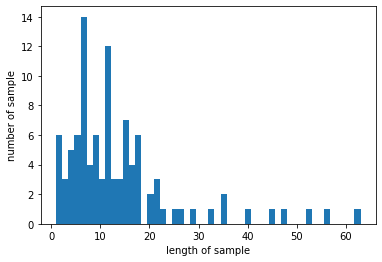

In [43]:
max_len = max(len(l)for l in encoded)
min_len = min(len(l) for l in encoded)
print('리뷰의 최대 길이:%d' %max_len)
print('리뷰의 최소 길이:%d' %min_len)
print('리뷰의 평균 길이:%f' %(sum(map(len,encoded))/len(encoded))) #map(function,iterable)

plt.hist([len(s) for s in encoded], bins = 50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [53]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰[1]으로 채운다.

In [54]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000


In [55]:
print(encoded[:3])

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 80, 189, 190, 191, 42, 192, 114, 5, 193, 194, 21, 115, 195, 196, 13, 51, 81, 116, 30, 42, 197, 117, 118, 31, 198, 5, 199, 200, 17, 114, 7, 82, 52, 17, 43, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
